<a href="https://colab.research.google.com/github/alastra32/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module4-real-world-experiment-design/LS_DS_134_Real_world_Experiment_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 144
## Real-world Experiment Design

![Induction experiment](https://upload.wikimedia.org/wikipedia/commons/1/1c/Induction_experiment.png)

[Induction experiment, Wikipedia](https://commons.wikimedia.org/wiki/File:Induction_experiment.png)

## Prepare - Learn about JavaScript and Google Analytics

Python is great - but with web applications, it's impossible to avoid JavaScript. The lingua franca of the web, JavaScript runs in all browsers, and thus all front-end code must either be JS or transpiled to it. As a data scientist you don't have to learn JavaScript - but you do have to be aware of it, and being able to figure out snippets of it is an invaluable skill to connect your skills with real-world applications.

So, we leave the warm comfort of Python, and venture to a bigger world - check out the [LambdaSchool/AB-Demo repo](https://github.com/LambdaSchool/AB-Demo) and [live experiment](https://lambdaschool.github.io/AB-Demo/) before class.

Additionally, sign up for [Google Analytics](https://www.google.com/analytics) - if you're not sure on the steps or what "property" to give it, you can put a placeholder or wait until the live lecture. Google also has [Analytics documentation](https://support.google.com/analytics/) that is worth a look.

Note - if you use any of the various tracker blocking techniques, it's quite likely you won't show up in Google Analytics. You'll have to disable them to be able to fully test your experiment.

## Live Lecture - Using Google Analytics with a live A/B test

Again we won't do much Python here, but we'll put a few notes and results in the notebook as we go.

In [0]:
import pandas as pd

df= pd.read_csv('Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv')
print(df.shape)
df.head()

(64000, 12)


,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


In [0]:
df.isna().sum()

recency            0
history_segment    0
history            0
mens               0
womens             0
zip_code           0
newbie             0
channel            0
segment            0
visit              0
conversion         0
spend              0
dtype: int64

In [0]:
df.segment.value_counts()

Womens E-Mail    21387
Mens E-Mail      21307
No E-Mail        21306
Name: segment, dtype: int64

In [0]:
df.history_segment.value_counts()

1) $0 - $100        22970
2) $100 - $200      14254
3) $200 - $350      12289
4) $350 - $500       6409
5) $500 - $750       4911
6) $750 - $1,000     1859
7) $1,000 +          1308
Name: history_segment, dtype: int64

In [0]:
df.groupby('segment').visit.mean()*100

segment
Mens E-Mail      18.275684
No E-Mail        10.616728
Womens E-Mail    15.140038
Name: visit, dtype: float64

In [0]:
df.groupby('segment').conversion.mean()*100

segment
Mens E-Mail      1.253109
No E-Mail        0.572609
Womens E-Mail    0.883714
Name: conversion, dtype: float64

In [0]:
df.groupby('segment').spend.mean()*100

segment
Mens E-Mail      142.261651
No E-Mail         65.278936
Womens E-Mail    107.720157
Name: spend, dtype: float64

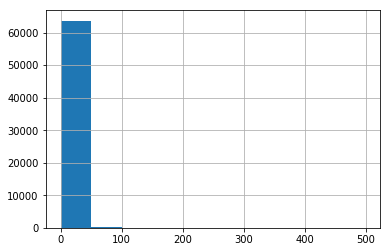

In [0]:
df

In [0]:
df['spend_bins']=pd.cut(df['spend'],[-0.01,100,200,300,400,500])
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,spend_bins
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,"(-0.01, 100.0]"
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,"(-0.01, 100.0]"
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,"(-0.01, 100.0]"
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,"(-0.01, 100.0]"
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,"(-0.01, 100.0]"


In [0]:
pd.crosstab(df['spend_bins'],df['conversion'] ,normalize='columns')

conversion,0,1
spend_bins,,
"(-0.01, 100.0]",1.0,0.595156
"(100.0, 200.0]",0.0,0.243945
"(200.0, 300.0]",0.0,0.081315
"(300.0, 400.0]",0.0,0.046713
"(400.0, 500.0]",0.0,0.032872


In [0]:
pd.crosstab(df['segment'], [df['visit'], df['conversion'], df['spend_bins']])


visit                      0              1  ...                              
conversion                 0              0  ...              1               
spend_bins    (-0.01, 100.0] (-0.01, 100.0]  ... (300.0, 400.0] (400.0, 500.0]
segment                                      ...                              
Mens E-Mail            17413           3627  ...             14              9
No E-Mail              19044           2140  ...              5              4
Womens E-Mail          18149           3049  ...              8              6

[3 rows x 7 columns]

## Assignment - Set up your own A/B test!

For a baseline, a straight fork of the Lambda School repo is OK. Getting that working with your own Analytics profile is already a task. But if you get through that, stretch goals:

1. Explore Google Analytics - it's big and changes frequently, but powerful (can track conversions and events, flows, etc.)
2. Customize the experiment to be more interesting/different (try colors!)
3. Check out the various tools for setting up A/B experiments (e.g. [Optimizely](https://www.optimizely.com/) and [alternatives](https://alternativeto.net/software/optimizely/))
4. Try to get enough traffic to actually have more real data (don't spam people, but do share with friends)
5. If you do get more traffic, don't just apply a t-test - dig into the results and use both math and writing to describe your findings

Additionally, today it is a good idea to go back and review the frequentist hypothesis testing material from the first two modules. And if you feel on top of things - you can use your newfound GitHub Pages and Google Analytics skills to build/iterate a portfolio page, and maybe even instrument it with Analytics!

https://alastra32.github.io/AB-Demo/

## Resources

- [Demo Google Analytics Data](https://support.google.com/analytics/answer/6367342?hl=en) - an Analytics profile you can add to your account with real data from the Google swag store
- [Design of Experiment](https://explorable.com/design-of-experiment) - an essay summarizing some of the things to be aware of when designing and running an experiment